In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]
all_unsable = borderline_unusable + unusable_samples

trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)
trimmed_metadata = trimmed_metadata.sort_index()
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=0)
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=1)

In [3]:
trimmed_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,0.0,3.731527,3.602189,0.0,0.0,31.063543,0.0,3.966935,...,17.950907,44.209074,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,0.0,1.501594,3.439569,0.0,0.0,22.712417,0.0,18.186693,...,1.986484,9.688606,0.0,5.501032,0.0,0.0,0.519342,0.0,0.000000,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.0,0.301733,2.700528,0.0,0.0,42.431625,0.0,12.937632,...,7.983340,16.384320,0.0,7.983340,0.0,0.0,0.166972,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,0.0,1.947758,3.742586,0.0,0.0,26.541337,0.0,23.861601,...,17.178143,17.005325,0.0,0.000000,0.0,0.0,0.628742,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,0.0,6.130092,4.215597,0.0,0.0,19.379509,0.0,5.006570,...,16.219201,43.599301,0.0,0.000000,0.0,0.0,1.074213,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,0.074367,4.474710,0.0,1.383813,2.059206,0.0,0.0,27.907884,0.0,11.118408,...,3.486989,4.209645,0.0,1.072920,0.0,0.0,0.948096,0.0,0.000000,0.760798
B250508004_n01_LICRNA03_H09,2.232353,6.249002,0.0,1.873955,3.869254,0.0,0.0,40.686812,0.0,7.391606,...,9.640892,4.655562,0.0,5.085306,0.0,0.0,0.360071,0.0,1.758217,4.807925
B250508004_n01_LICRNA03_H10,0.000000,0.000000,0.0,0.000000,2.953706,0.0,0.0,36.084398,0.0,0.000000,...,0.000000,4.975538,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
B250508004_n01_LICRNA03_H11,0.678594,7.655887,0.0,0.901942,4.195848,0.0,0.0,54.077818,0.0,0.334834,...,0.000000,2.304762,0.0,0.000000,0.0,0.0,0.166371,0.0,0.000000,0.694222


In [4]:
trimmed_transcriptome.loc[:, (trimmed_transcriptome > .5).mean() > .25 ]

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp083,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,3.731527,3.602189,31.063543,3.966935,1.411759,1.457120,42.945840,444.662416,...,69.429954,62.741033,199.389218,0.000000,17.950907,44.209074,0.0,0.000000,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,1.501594,3.439569,22.712417,18.186693,1.249825,9.110504,39.905696,646.795455,...,2.364080,4.165830,69.172057,19.592718,1.986484,9.688606,0.0,5.501032,0.519342,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.301733,2.700528,42.431625,12.937632,1.412672,6.318269,46.990547,506.979411,...,7.125626,50.225286,122.221814,0.000000,7.983340,16.384320,0.0,7.983340,0.166972,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,1.947758,3.742586,26.541337,23.861601,6.417176,12.549534,61.319447,518.715703,...,0.000000,6.004011,73.945487,42.357065,17.178143,17.005325,0.0,0.000000,0.628742,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,6.130092,4.215597,19.379509,5.006570,1.275568,13.823806,38.392286,564.791987,...,28.953284,41.571544,302.404404,85.317440,16.219201,43.599301,0.0,0.000000,1.074213,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,0.074367,4.474710,1.383813,2.059206,27.907884,11.118408,0.959827,8.349903,46.544681,615.926075,...,0.000000,19.500054,33.460202,8.598055,3.486989,4.209645,0.0,1.072920,0.948096,0.760798
B250508004_n01_LICRNA03_H09,2.232353,6.249002,1.873955,3.869254,40.686812,7.391606,2.003849,9.502699,49.843239,396.885544,...,0.000000,1.925504,58.827578,0.000000,9.640892,4.655562,0.0,5.085306,0.360071,4.807925
B250508004_n01_LICRNA03_H10,0.000000,0.000000,0.000000,2.953706,36.084398,0.000000,0.000000,8.363616,21.519991,469.435651,...,0.000000,0.000000,133.762303,0.000000,0.000000,4.975538,0.0,0.000000,0.000000,0.000000
B250508004_n01_LICRNA03_H11,0.678594,7.655887,0.901942,4.195848,54.077818,0.334834,4.691971,15.496729,63.435646,483.745498,...,0.000000,0.000000,26.292737,0.000000,0.000000,2.304762,0.0,0.000000,0.166371,0.694222


In [5]:
trimmed_transcriptome.std() >1.5

AT1G01010    False
AT1G01020     True
AT1G03987    False
AT1G01030     True
AT1G01040    False
             ...  
ArthCt118    False
ArthCp083    False
ArthCt111    False
ArthCp084     True
ArthCp085     True
Length: 38287, dtype: bool

In [6]:
np.all(((trimmed_transcriptome > .5).mean() > .25).index == (trimmed_transcriptome.std() >1.5).index)

np.True_

In [50]:
column_coefficient_of_variation = trimmed_transcriptome.std() / trimmed_transcriptome.mean()
high_variance_genes = trimmed_transcriptome.loc[:,(column_coefficient_of_variation >2) & ( (trimmed_transcriptome > .5).mean() > .25 ) ]


In [51]:
high_variance_genes

,AT1G01770,AT1G02050,AT1G02390,AT1G04123,AT1G02450,AT1G03120,AT1G03660,AT1G03940,AT1G04330,AT1G04900,...,AT5G66700,AT5G67310,unassigned_gene_9,unassigned_gene_41,DA397_mgp21,unassigned_gene_139,unassigned_gene_174,unassigned_gene_221,ArthCr086,ArthCt112
A2449446903_n01_LICRNA02_A01,2.990559,0.000000,4.673814,0.000000,1.037292,18.978932,23.655771,0.000000,0.000000,0.000000,...,0.686751,0.000000,0.000000,110.782739,0.000000,179.509068,0.000000,0.000000,0.433422,0.0
A2449446903_n01_LICRNA02_A02,1.022910,0.650122,1.517160,0.000000,1.607043,0.000000,1.070916,0.223712,0.206091,4.866542,...,0.000000,0.401085,28.605369,16.345925,0.665861,23.837807,3.575671,0.000000,0.095927,0.0
A2449446903_n01_LICRNA02_A03,0.725453,0.000000,0.138573,0.000000,0.000000,0.000000,0.000000,0.299687,0.000000,3.977858,...,0.305420,0.000000,0.000000,0.000000,0.267598,15.966681,7.185006,0.000000,1.734810,0.0
A2449446903_n01_LICRNA02_A05,1.560992,0.000000,3.876264,0.000000,0.000000,0.908096,0.000000,1.289704,0.000000,5.706234,...,0.000000,0.000000,247.365260,0.000000,1.727411,0.000000,0.000000,0.000000,2.903348,0.0
A2449446903_n01_LICRNA02_A06,0.327523,0.000000,1.126116,11.524169,0.000000,0.000000,0.000000,0.608854,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,151.379209,0.000000,0.000000,3.655031,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,0.105622,0.000000,0.726316,0.000000,0.000000,0.368668,0.000000,0.000000,0.000000,0.579154,...,0.000000,0.563238,50.212640,0.000000,0.701294,27.895911,0.000000,0.000000,0.168386,0.0
B250508004_n01_LICRNA03_H09,3.170561,0.386351,2.629696,3.261956,1.114196,0.000000,0.000000,0.361910,0.000000,1.258129,...,2.213000,1.334786,118.996156,33.998902,0.553986,5.509081,0.000000,0.000000,2.793337,0.0
B250508004_n01_LICRNA03_H10,0.000000,0.000000,2.980765,0.000000,0.000000,0.000000,0.000000,8.380332,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.829256,0.0
B250508004_n01_LICRNA03_H11,0.722844,0.371905,1.656895,0.000000,0.919315,0.000000,1.905934,0.000000,0.000000,2.312072,...,0.000000,0.321219,0.000000,0.000000,3.199627,0.000000,0.000000,0.000000,1.152381,0.0


In [52]:
cleaned_transcriptome = trimmed_transcriptome.loc[:, (trimmed_transcriptome > 1.5).mean() > .8 ]
cleaned_transcriptome

,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01120,AT1G01130,AT1G01140,...,ArthCp075,ArthCp076,ArthCp077,ArthCp078,ArthCp079,ArthCp080,ArthCp081,Arthcp087,ArthCr089,ArthCr088
A2449446903_n01_LICRNA02_A01,11.929183,3.602189,31.063543,3.966935,1.457120,42.945840,444.662416,43.145162,25.849306,46.656883,...,26.269620,665.239487,205.674797,1087.015605,165.287574,24.056038,600.246052,165.264868,199.389218,44.209074
A2449446903_n01_LICRNA02_A02,5.826682,3.439569,22.712417,18.186693,9.110504,39.905696,646.795455,68.725374,15.256197,12.715210,...,50.582664,802.539508,120.939835,81.572149,220.417175,15.730533,898.872818,162.982836,69.172057,9.688606
A2449446903_n01_LICRNA02_A03,7.683520,2.700528,42.431625,12.937632,6.318269,46.990547,506.979411,110.506236,38.320033,14.555832,...,31.543930,637.728004,127.192201,166.127312,159.224515,18.965499,738.414123,139.491783,122.221814,16.384320
A2449446903_n01_LICRNA02_A05,3.149144,3.742586,26.541337,23.861601,12.549534,61.319447,518.715703,78.657813,18.140119,22.990575,...,42.735868,539.595788,72.206432,151.326532,210.134847,21.974071,629.993921,213.751085,73.945487,17.005325
A2449446903_n01_LICRNA02_A06,1.238895,4.215597,19.379509,5.006570,13.823806,38.392286,564.791987,47.045168,11.418317,18.666063,...,49.053193,996.049750,145.148103,237.756610,153.475873,26.675234,752.279341,140.209410,302.404404,43.599301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,4.474710,2.059206,27.907884,11.118408,8.349903,46.544681,615.926075,100.694451,14.729041,13.324205,...,60.724636,423.771708,81.560079,70.142898,153.582059,24.851434,887.184004,181.940036,33.460202,4.209645
B250508004_n01_LICRNA03_H09,6.249002,3.869254,40.686812,7.391606,9.502699,49.843239,396.885544,156.670540,12.428487,22.066008,...,43.535179,457.901875,95.054996,36.111550,179.464809,22.315974,941.124405,115.699956,58.827578,4.655562
B250508004_n01_LICRNA03_H10,0.000000,2.953706,36.084398,0.000000,8.363616,21.519991,469.435651,125.931797,0.000000,3.997052,...,0.000000,602.048272,156.007959,28.587775,90.191396,26.151042,782.603734,128.231717,133.762303,4.975538
B250508004_n01_LICRNA03_H11,7.655887,4.195848,54.077818,0.334834,15.496729,63.435646,483.745498,110.806581,58.036970,26.538287,...,81.486439,836.639760,60.401248,12.138855,129.036856,5.330005,448.319292,135.464610,26.292737,2.304762


In [53]:
transcriptome_plus_oh_one = high_variance_genes + 0.1


In [54]:
log_normalized_transcriptome = np.log10(transcriptome_plus_oh_one)

In [55]:
trimmed_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,A01,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284.0,82176.0,A,1,1246970.0,Long Term,January,83,2024-01-23 08:00:00
A2449446903_n01_LICRNA02_A02,A02,LIC169,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,3071877.0,353549.0,A,2,4985602.0,Long Term,January,87,2024-01-27 08:00:00
A2449446903_n01_LICRNA02_A03,A03,LIC193,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,1213638.0,158864.0,A,3,2465662.0,Long Term,February,93,2024-02-02 08:00:00
A2449446903_n01_LICRNA02_A05,A05,LIC217,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,1303436.0,90929.0,A,5,1515395.0,Long Term,February,100,2024-02-09 08:00:00
A2449446903_n01_LICRNA02_A06,A06,LIC229,plant,t20,2/16/24,8:00,LIC_03,LICRNA_02,1591231.0,141665.0,A,6,1924391.0,Long Term,February,107,2024-02-16 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,H08,LIC428,plant,c1_t04,2/10/24,8:00,LICCIRC_01,LICRNA_03,2552177.0,438552.0,H,8,5245242.0,Circadian Experiment 1,February,101,2024-02-10 08:00:00
B250508004_n01_LICRNA03_H09,H09,LIC440,plant,c1_t05,2/10/24,12:00,LICCIRC_01,LICRNA_03,4228242.0,493699.0,H,9,7715482.0,Circadian Experiment 1,February,101,2024-02-10 12:00:00
B250508004_n01_LICRNA03_H10,H10,LIC452,plant,c1_t06,2/10/24,16:00,LICCIRC_01,LICRNA_03,365095.0,39090.0,H,10,643786.0,Circadian Experiment 1,February,101,2024-02-10 16:00:00


In [56]:
trimmed_metadata.sort_values(by = 'daysincestart')

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2450525897_n01_LICRNA01_C01,C01,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,97848.0,C,1,2936453.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_D01,D01,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,49095.0,D,1,1359823.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_B01,B01,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,226718.0,B,1,5984566.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_E01,E01,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,135512.0,E,1,2680737.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_A01,A01,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,112554.0,A,1,2248661.0,Long Term,November,0,2023-11-01 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_A01,A01,LIC325,plant,t28,3/14/24,8:00,LIC_04,LICRNA_03,2172476.0,318286.0,A,1,4702045.0,Long Term,March,134,2024-03-14 08:00:00
B250508004_n01_LICRNA03_D01,D01,LIC328,plant,t28,3/14/24,8:00,LIC_04,LICRNA_03,3194457.0,357886.0,D,1,4740120.0,Long Term,March,134,2024-03-14 08:00:00
B250508004_n01_LICRNA03_F01,F01,LIC330,plant,t28,3/14/24,8:00,LIC_04,LICRNA_03,3716517.0,352085.0,F,1,5171208.0,Long Term,March,134,2024-03-14 08:00:00


In [57]:
months = dict(zip(['November','December','January','February','March'], ["#003f5c",'#444e86','#955196','#dd5182','#ff6e54','#ffa600']))
row_colors = trimmed_metadata['Sample Month'].map(months)
row_colors

filename
A2449446903_n01_LICRNA02_A01    #955196
A2449446903_n01_LICRNA02_A02    #955196
A2449446903_n01_LICRNA02_A03    #dd5182
A2449446903_n01_LICRNA02_A05    #dd5182
A2449446903_n01_LICRNA02_A06    #dd5182
                                 ...   
B250508004_n01_LICRNA03_H08     #dd5182
B250508004_n01_LICRNA03_H09     #dd5182
B250508004_n01_LICRNA03_H10     #dd5182
B250508004_n01_LICRNA03_H11     #dd5182
B250508004_n01_LICRNA03_H12     #dd5182
Name: Sample Month, Length: 369, dtype: object

In [58]:
high_variance_genes

,AT1G01770,AT1G02050,AT1G02390,AT1G04123,AT1G02450,AT1G03120,AT1G03660,AT1G03940,AT1G04330,AT1G04900,...,AT5G66700,AT5G67310,unassigned_gene_9,unassigned_gene_41,DA397_mgp21,unassigned_gene_139,unassigned_gene_174,unassigned_gene_221,ArthCr086,ArthCt112
A2449446903_n01_LICRNA02_A01,2.990559,0.000000,4.673814,0.000000,1.037292,18.978932,23.655771,0.000000,0.000000,0.000000,...,0.686751,0.000000,0.000000,110.782739,0.000000,179.509068,0.000000,0.000000,0.433422,0.0
A2449446903_n01_LICRNA02_A02,1.022910,0.650122,1.517160,0.000000,1.607043,0.000000,1.070916,0.223712,0.206091,4.866542,...,0.000000,0.401085,28.605369,16.345925,0.665861,23.837807,3.575671,0.000000,0.095927,0.0
A2449446903_n01_LICRNA02_A03,0.725453,0.000000,0.138573,0.000000,0.000000,0.000000,0.000000,0.299687,0.000000,3.977858,...,0.305420,0.000000,0.000000,0.000000,0.267598,15.966681,7.185006,0.000000,1.734810,0.0
A2449446903_n01_LICRNA02_A05,1.560992,0.000000,3.876264,0.000000,0.000000,0.908096,0.000000,1.289704,0.000000,5.706234,...,0.000000,0.000000,247.365260,0.000000,1.727411,0.000000,0.000000,0.000000,2.903348,0.0
A2449446903_n01_LICRNA02_A06,0.327523,0.000000,1.126116,11.524169,0.000000,0.000000,0.000000,0.608854,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,151.379209,0.000000,0.000000,3.655031,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,0.105622,0.000000,0.726316,0.000000,0.000000,0.368668,0.000000,0.000000,0.000000,0.579154,...,0.000000,0.563238,50.212640,0.000000,0.701294,27.895911,0.000000,0.000000,0.168386,0.0
B250508004_n01_LICRNA03_H09,3.170561,0.386351,2.629696,3.261956,1.114196,0.000000,0.000000,0.361910,0.000000,1.258129,...,2.213000,1.334786,118.996156,33.998902,0.553986,5.509081,0.000000,0.000000,2.793337,0.0
B250508004_n01_LICRNA03_H10,0.000000,0.000000,2.980765,0.000000,0.000000,0.000000,0.000000,8.380332,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.829256,0.0
B250508004_n01_LICRNA03_H11,0.722844,0.371905,1.656895,0.000000,0.919315,0.000000,1.905934,0.000000,0.000000,2.312072,...,0.000000,0.321219,0.000000,0.000000,3.199627,0.000000,0.000000,0.000000,1.152381,0.0


In [59]:
log_normalized_transcriptome.reindex(index = trimmed_metadata.sort_values(by = 'daysincestart').index)

,AT1G01770,AT1G02050,AT1G02390,AT1G04123,AT1G02450,AT1G03120,AT1G03660,AT1G03940,AT1G04330,AT1G04900,...,AT5G66700,AT5G67310,unassigned_gene_9,unassigned_gene_41,DA397_mgp21,unassigned_gene_139,unassigned_gene_174,unassigned_gene_221,ArthCr086,ArthCt112
filename,,,,,,,,,,,,,,,,,,,,,
A2450525897_n01_LICRNA01_C01,-1.000000,-1.000000,-1.000000,-1.000000,0.467136,-1.000000,-1.000000,1.196921,0.714682,0.679443,...,-1.000000,0.486912,2.149950,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.108310,-1.000000
A2450525897_n01_LICRNA01_D01,-1.000000,0.925512,-1.000000,-1.000000,0.933104,-1.000000,-1.000000,0.455148,-1.000000,0.791552,...,0.756581,0.676876,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.667601,-1.000000
A2450525897_n01_LICRNA01_B01,-0.289449,0.103852,0.081284,-1.000000,-1.000000,0.438722,-0.626556,0.777675,0.561194,0.578012,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.597683,1.804874,-1.000000,1.807558,-0.119624,-1.000000
A2450525897_n01_LICRNA01_E01,-0.185896,-1.000000,0.225566,-1.000000,-1.000000,-1.000000,-1.000000,0.985591,-1.000000,0.716477,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.214692,-1.000000
A2450525897_n01_LICRNA01_A01,0.144108,-1.000000,0.714562,-1.000000,-1.000000,0.928643,-1.000000,1.410758,0.513820,0.825167,...,0.929520,-0.227170,-1.000000,-1.000000,-1.000000,-1.000000,1.343641,-1.000000,0.106656,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_A01,0.187031,0.764064,0.531067,0.443669,0.631546,-1.000000,0.328703,0.163777,-1.000000,-0.070026,...,-0.350655,-1.000000,-1.000000,1.668514,0.283068,-1.000000,-1.000000,-1.000000,0.034502,-1.000000
B250508004_n01_LICRNA03_D01,-0.259625,0.553034,0.427940,-1.000000,0.259353,-1.000000,-0.215720,-0.181966,0.559074,0.662236,...,-1.000000,-1.000000,-1.000000,-1.000000,0.527954,-1.000000,-1.000000,-1.000000,-0.515729,-1.000000
B250508004_n01_LICRNA03_F01,0.186075,0.751038,0.294193,0.564645,-1.000000,-0.106259,-1.000000,-0.582262,0.407779,0.532509,...,-0.577159,-1.000000,1.018513,1.492851,-0.014977,-1.000000,-1.000000,-1.000000,-1.000000,1.413949


/Users/michael/miniconda3/envs/Luke_terrace/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: float or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 

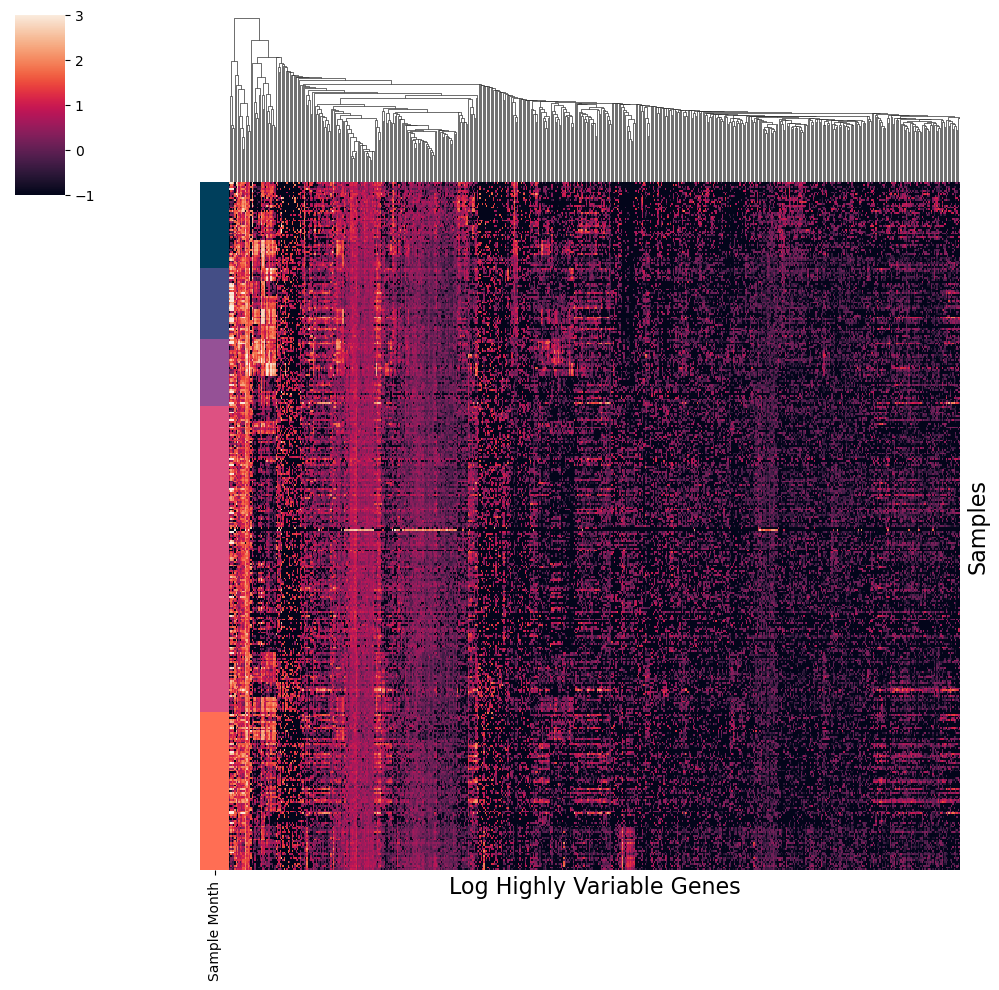

In [61]:
ax = sns.clustermap(log_normalized_transcriptome.reindex(index = trimmed_metadata.sort_values(by = 'daysincestart').index), vmax = 3, row_colors= row_colors, row_cluster = False, yticklabels=False,xticklabels=False)
plt.setp(ax.ax_heatmap.set_xlabel('Log Highly Variable Genes', fontsize = 16 ), )
plt.setp(ax.ax_heatmap.set_ylabel('Samples', fontsize = 16 ))
ax.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/transcriptome_highly_variable_genes_heatmap.pdf')